In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [104]:
urltrain = "/content/drive/MyDrive/cs-training.csv"
train = pd.read_csv(urltrain)
train = train.drop(train.iloc[:,0:1],axis=1)
Y_train = train['SeriousDlqin2yrs']
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [105]:
urltest = "/content/drive/MyDrive/cs-test.csv"
test = pd.read_csv(urltest)
test = test.drop(columns = {"SeriousDlqin2yrs"}, axis = 1)
X_test = test.drop(test.iloc[:,0:1],axis=1)

In [106]:
url_test_labels = "/content/drive/MyDrive/sampleEntry.csv"
label_proba = pd.read_csv(url_test_labels)
label_proba = label_proba.drop(label_proba.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in label_proba:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

In [107]:
X_test['labels'] = Y_test

**Using Simple Imputer for handling the NAN values**

In [108]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [109]:
X_test = X_test.dropna()

In [110]:
Y_test = X_test['labels']
X_test = X_test.drop(['labels'], axis = 1)

**Standard Scaling**

In [111]:
sc = StandardScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Splitting of Training Data to Training and Validation Data**

In [112]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

**MLP Classifier**

**Model - Training**

In [113]:
mlp = MLPClassifier(hidden_layer_sizes = (128,64,64), activation = 'logistic', batch_size = 128)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='logistic', batch_size=128,
              hidden_layer_sizes=(128, 64, 64))

**Prediction on Validation Set**

In [114]:
Y_val_pred = mlp.predict(X_val)

In [115]:
print(mlp.score(X_val, Y_val))

0.9364222222222223


**Prediction on Test Set**

In [116]:
Y_test_pred = mlp.predict(X_test)

In [117]:
print(mlp.score(X_test, Y_test))

0.9893366093366094


In [118]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80040
           1       0.65      0.80      0.72      1360

    accuracy                           0.99     81400
   macro avg       0.82      0.90      0.86     81400
weighted avg       0.99      0.99      0.99     81400



Text(0.5, 1.0, 'Training Loss vs Epochs')

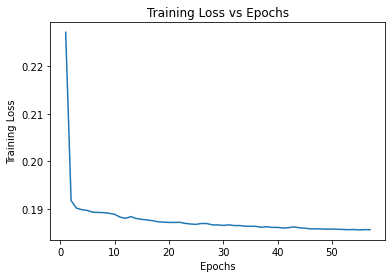

In [119]:
training_loss = mlp.loss_curve_
iterations = []
for i in range(len(training_loss)):
  iterations.append(i+1)
plt.plot(iterations, training_loss)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title("Training Loss vs Epochs")

**HyperParameter Tuning for MLP Classifier**

**1. Activation Functions**

In [140]:
activation_functions = ['relu', 'logistic', 'tanh', 'identity']
relu_loss = []
logistic_loss = []
tanh_loss = []
identity_loss = []

In [141]:
for i in range(len(activation_functions)):
  mlp = MLPClassifier(activation = activation_functions[i], n_iter_no_change = 250, learning_rate_init=0.001)
  mlp = mlp.fit(X_train, Y_train)
  if activation_functions[i] == 'relu':
    print('Validation Score for relu activation = ', mlp.score(X_val, Y_val))
    print('Testing Score for relu activation = ', mlp.score(X_test, Y_test))
    print()
    relu_loss = mlp.loss_curve_
  elif activation_functions[i] == 'logistic':
    print('Validation Score for logistic activation = ', mlp.score(X_val, Y_val))
    print('Testing Score for logistic activation = ', mlp.score(X_test, Y_test))
    print()
    logistic_loss = mlp.loss_curve_
  elif activation_functions[i] == 'tanh':
    print('Validation Score for tanh activation = ', mlp.score(X_val, Y_val))
    print('Testing Score for tanh activation = ', mlp.score(X_test, Y_test))
    print()
    tanh_loss = mlp.loss_curve_
  elif activation_functions[i] == 'identity':
    print('Validation Score for identity activation = ', mlp.score(X_val, Y_val))
    print('Testing Score for identity activation = ', mlp.score(X_test, Y_test))
    print()
    identity_loss = mlp.loss_curve_

Validation Score for relu activation =  0.9349777777777778
Testing Score for relu activation =  0.9882678132678133

Validation Score for logistic activation =  0.9358
Testing Score for logistic activation =  0.9891769041769042

Validation Score for tanh activation =  0.9356
Testing Score for tanh activation =  0.9877395577395578

Validation Score for identity activation =  0.9335777777777777
Testing Score for identity activation =  0.9845823095823096



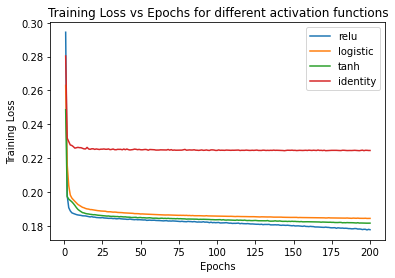

In [142]:
iterations = []
for i in range(len(relu_loss)):
  iterations.append(i+1)
plt.plot(iterations, relu_loss, label = 'relu')
plt.plot(iterations, logistic_loss, label = 'logistic')
plt.plot(iterations, tanh_loss, label = 'tanh')
plt.plot(iterations, identity_loss, label = 'identity')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs for different activation functions')
plt.legend()
plt.show()

**2. Learning Rate**

In [146]:
learning_rate = [0.1, 0.01, 0.001]
l_1_loss = []
l_2_loss = []
l_3_loss = []

In [149]:
for i in range(len(learning_rate)):
  mlp = MLPClassifier(n_iter_no_change = 250, max_iter = 100, learning_rate_init=learning_rate[i])
  mlp = mlp.fit(X_train, Y_train)
  if learning_rate[i] == 0.1:
    print('Validation Score for 0.1 learning rate = ', mlp.score(X_val, Y_val))
    print('Testing Score for 0.1 learning rate = ', mlp.score(X_test, Y_test))
    print()
    l_1_loss = mlp.loss_curve_
  if learning_rate[i] == 0.01:
    print('Validation Score for 0.01 learning rate = ', mlp.score(X_val, Y_val))
    print('Testing Score for 0.01 learning rate = ', mlp.score(X_test, Y_test))
    print()
    l_2_loss = mlp.loss_curve_
  if learning_rate[i] == 0.001:
    print('Validation Score for 0.001 learning rate = ', mlp.score(X_val, Y_val))
    print('Testing Score for 0.001 learning rate = ', mlp.score(X_test, Y_test))
    print()
    l_3_loss = mlp.loss_curve_

Validation Score for 0.1 learning rate =  0.9325555555555556
Testing Score for 0.1 learning rate =  0.9832923832923833

Validation Score for 0.01 learning rate =  0.9356
Testing Score for 0.01 learning rate =  0.98995085995086

Validation Score for 0.001 learning rate =  0.9362444444444444
Testing Score for 0.001 learning rate =  0.9884889434889435



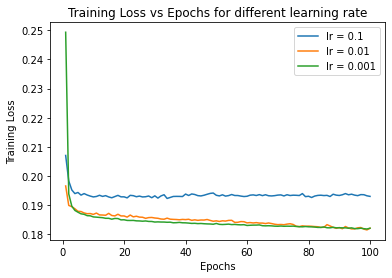

In [151]:
iterations = []
for i in range(len(l_1_loss)):
  iterations.append(i+1)
plt.plot(iterations, l_1_loss, label = 'lr = 0.1')
plt.plot(iterations, l_2_loss, label = 'lr = 0.01')
plt.plot(iterations, l_3_loss, label = 'lr = 0.001')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs for different learning rate')
plt.legend()
plt.show()